In [13]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from scipy import stats

# Load the dataset from CSV
data = pd.read_csv('table_data.csv')

# Show a sample of the data to verify it's loaded correctly
data


,id,student,scenario_question,student_answer,openai_answer,student_facts_identified,is_answered_correct,Pretest_Score,Posttest_Score,P_Known (BKT),Mastery (0/1)
0,18,student10,QuestionScenario object (7),Motor vehicle destroyed and purchase of desks ...,You did a commendable job identifying the key ...,NaN,True,0,0.99,0.99,level 2
1,17,student10,QuestionScenario object (6),Gross income should be amount which is from a ...,You did a commendable job identifying the key ...,Feedback: Student correctly identified the rul...,False,0,0.99,0.99,level 2
2,16,student10,QuestionScenario object (4),Though the divident is from a foregn company i...,"Firstly, you did a commendable job in identify...",NaN,True,0,0.99,0.99,level 2
3,15,student9,QuestionScenario object (4),Though the divident is from a foregn company i...,You did a good job identifying the key princip...,NaN,True,0,0.98,0.98,level 2
4,14,student8,QuestionScenario object (4),Though the dividend is from a foreign company ...,You did a commendable job acknowledging that t...,NaN,True,0,0.98,0.98,level 2
5,13,student7,QuestionScenario object (4),The source of foreign dividends is the place w...,You've made a solid start in your answer by ac...,Feedback: The student did not identify the rul...,False,0,0.66,0.66,level 2
6,12,student6,QuestionScenario object (4),source of the dividend is from southafrica but...,You've made a good start in your analysis by r...,NaN,False,0,0.66,0.66,level 2
7,11,student5,QuestionScenario object (6),source of the dividend is from southafrica but...,You did a commendable job in attempting to ide...,Feedback: The student did not correctly identi...,False,0,0.33,0.33,level 2
8,10,student5,QuestionScenario object (4),Dividends from South Africa are in the gross t...,You did a good job in identifying that foreign...,Feedback: The student did not identify the rul...,False,0,0.33,0.33,level 2
9,9,student4,QuestionScenario object (4),Dividends from South Africa are deemed to be i...,You did a commendable job identifying that div...,Feedback: The student did not identify the rul...,False,0,0.60,0.60,level 2


In [7]:
# Extract Pretest and Posttest Scores for the t-test
pretest_scores = data['Pretest_Score']
posttest_scores = data['Posttest_Score']

# Perform paired t-test
t_stat, p_value = stats.ttest_rel(pretest_scores, posttest_scores)

# Display results
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

# Interpretation of p-value
if p_value < 0.05:
    print("There is a significant improvement in student performance after using the system.")
else:
    print("No significant improvement was found.")


T-statistic: -10.1341, P-value: 0.0000
There is a significant improvement in student performance after using the system.


In [9]:
# Convert 'Mastery (0/1)' to binary (0 or 1), filtering out other levels
# Assuming 'level 2' should be treated as non-mastery (0)
data['Mastery (0/1)'] = data['Mastery (0/1)'].apply(lambda x: 1 if x == 1 else 0)

# Alternatively, filter out rows that don't have valid mastery values (0 or 1)
# data = data[data['Mastery (0/1)'].isin([0, 1])]

# Check the unique values to ensure they're binary
print(data['Mastery (0/1)'].unique())


[0]


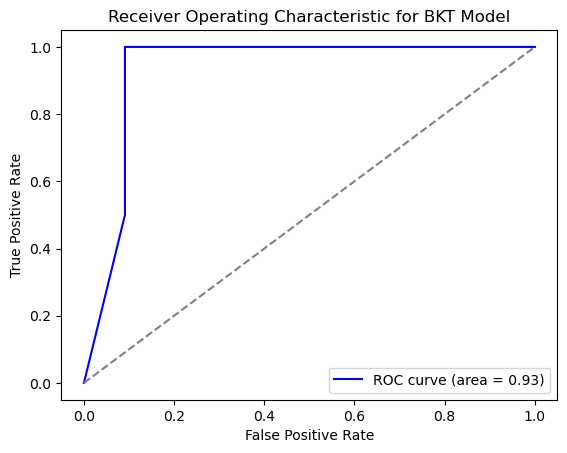

In [12]:
# True mastery outcomes and predicted probabilities
true_labels = data['is_answered_correct']
predicted_probs = data['P_Known (BKT)']

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for BKT Model')
plt.legend(loc='lower right')
plt.show()
